# Assignment 5: PCA and Clustering 

In [296]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans


In [298]:
# global variables

DATASET_COLUMNS = ["area",
"perimeter",
"compactness",
"length_of_kernel",
"width_of_kernel",
"asymmetry_coefficient",
"length_of_kernel_groove",
"Target"]

## Part 1: Principle Component Analysis

In [299]:
# load data
df = pd.read_csv("seeds_dataset.txt", delimiter="\t", names=DATASET_COLUMNS)

In [300]:
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,Target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [301]:
# separate the feature and target vector
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Step 2: Preprocessing 

To preprocess the data, we will need to scale the data. Which scaler would you select and why?

For this dataset, standard scaling is recommended due to the implied Gaussian distribution. It enables meaningful feature comparisons, enhances model convergence, prevents undue influence from features solely based on their magnitude, and mitigates the impact of outliers.

In [302]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [303]:
# Print the shape of the training feature matrix and target vector
print(X_train.shape)
print(y_train.shape)

(157, 7)
(157,)


In [304]:
# Scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


### Step 3: Model Selection 

In [305]:
# Instantiate model
model = LogisticRegression()

### Step 4: Validation 

In [306]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [307]:
#grid search and print the best parameters, cross-validation score and test score
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'fit_intercept': [True, False]})

In [308]:
print(f"Best grid estimator: {grid.best_estimator_}")
print(f"Best grid parameters: {grid.best_params_}")
print(f"Best grid score: {grid.best_score_}")

Best grid estimator: LogisticRegression(C=10.0)
Best grid parameters: {'C': 10.0, 'fit_intercept': True}
Best grid score: 0.9368951612903226


In [309]:
y_pred = grid.predict(scaled_X_test)
test_score = accuracy_score(y_test, y_pred)
print("Test Score:", test_score)

Test Score: 0.9433962264150944


### Step 5: Visualize using PCA

In [310]:
# Predict y labels using best estimator
pred_label = grid.best_estimator_.predict(scaled_X_test)
pred_label

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1,
       1, 1, 2, 2, 2, 1, 3, 3, 2, 3, 1, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 3,
       1, 2, 2, 1, 1, 2, 1, 2, 3], dtype=int64)

In [311]:
total_len = len(pred_label)
mismatch_count = 0

for ground_truth, pred_value in zip(y_test, pred_label):
    if ground_truth != pred_value:
        print(f"Ground Truth: {ground_truth}, Predicted Value: {pred_value}")
        mismatch_count += 1

print(f"Got {total_len-mismatch_count}/{total_len} correct values!")



Ground Truth: 2, Predicted Value: 1
Ground Truth: 2, Predicted Value: 1
Ground Truth: 2, Predicted Value: 1
Got 50/53 correct values!


In [312]:
# Reduce dimensions of test data for plotting
pca = PCA(n_components=2)
projected = pca.fit_transform(scaled_X_test)

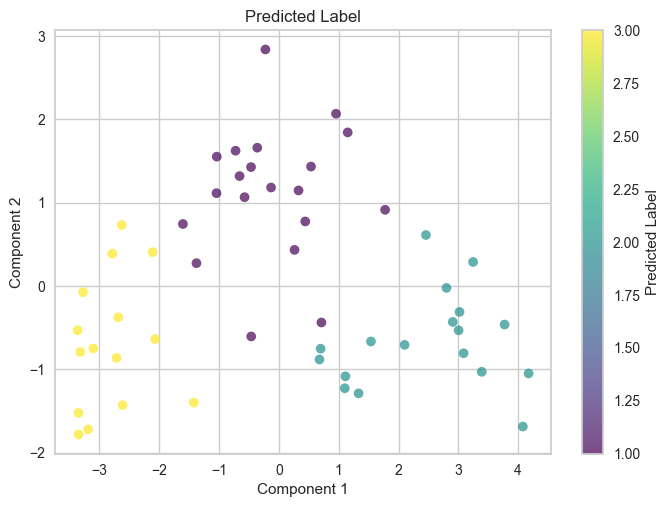

In [313]:
# Plot test points colored by predicted label
plt.scatter(projected[:, 0], projected[:, 1], c=pred_label, edgecolor="none", alpha=0.7, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Predicted Label")
plt.title("Predicted Label")
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

1. The logistic regression model proved to be a strong fit for this dataset, achieving an impressive test accuracy of **0.94**. This result suggests that the model is effective for handling unseen data.

2. The PCA model performed admirably in this context, yielding an accuracy rate similar to that of logistic regression, where it correctly predicted **50 out of 53** labels, achieving an accuracy of **0.94**. While the model is not flawless, an examination of the graph indicates that good clusters should exhibit proximity without overlapping values.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. I used ChatGPT for code review and to address my queries, and I also referred to Python documentation sites like Pandas and scikit-learn.

   - [ChatGPT](https://chat.openai.com)
   - [scikit-learn](https://scikit-learn.org/stable/index.html)

2. I didn't complete my steps in a linear order; I had to backtrack to check certain values.

3. My initial prompt to ChatGPT was: "Act as a machine learning engineer with Python as your primary programming language." Subsequent prompts requested code samples to illustrate workflows and posed conceptual questions.

4. I encountered challenges with data visualization, often relying on ChatGPT or reviewing class notebooks extensively.

## Part 2. Implement clustering

### Step 1: Cluster using original data

In [314]:
# reload dataset
df = pd.read_csv("seeds_dataset.txt", delimiter="\t", names=DATASET_COLUMNS)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# scale df
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

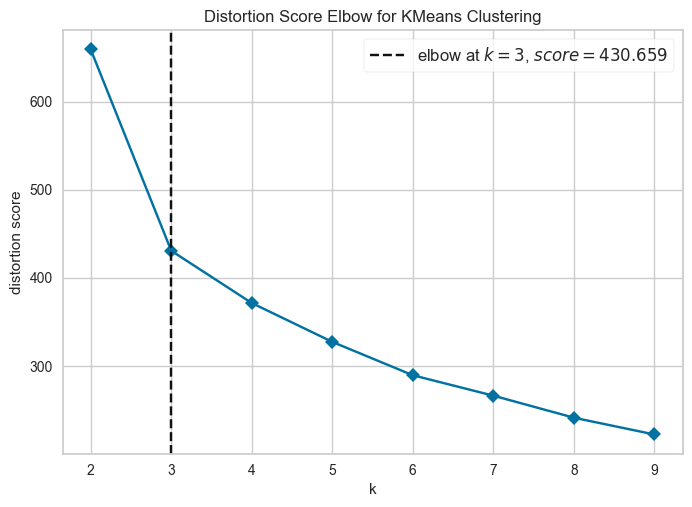

In [315]:
# Use the elbow method to determine the optimal number of clusters
ke=kelbow_visualizer(KMeans(random_state=4, n_init=10), scaled_X, k=(2,10), metric="distortion", timings=False)

In [316]:
# optimal cluster values
n_clusters = ke.elbow_value_

In [317]:
# Implement K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(scaled_X)

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [318]:
# Evaluate clusters
test_clusters = kmeans.predict(scaled_X)

In [319]:
# Calculate the sil score
average_sil_score = silhouette_score(scaled_X, test_clusters)

print(f"Silhouette Score: {average_sil_score}")

Silhouette Score: 0.40072705527512986


In [320]:
# Calculate cal score
average_cal_score = calinski_harabasz_score(scaled_X, test_clusters)
print(f"Calinski-Harabasz score {average_cal_score}")

Calinski-Harabasz score 249.7841749161647


In [321]:
# Calculate dav score
average_dav_score = davies_bouldin_score(scaled_X, test_clusters)
print(f"Davies-Bouldin score {average_dav_score}")

Davies-Bouldin score 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

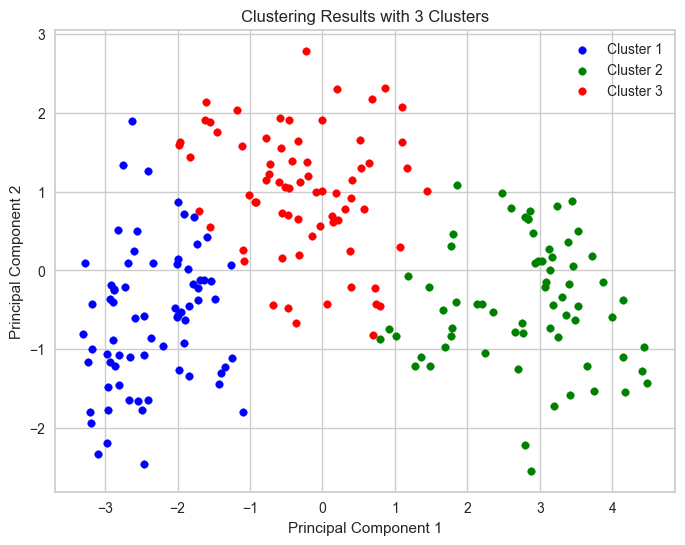

In [322]:
# Plot clustering results
pca = PCA(n_components=2)
cluster_assignments = kmeans.predict(scaled_X)
pca_transformed = pca.fit_transform(scaled_X)

# Plot the PCA-reduced data with the cluster assignments
plt.figure(figsize=(8, 6))

# Colors for each cluster
colors = ["blue", "green", "red"]

# Loop through each cluster and plot them with different colors
for i in range(n_clusters):
    points = pca_transformed[cluster_assignments == i]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=f"Cluster {i+1}")

plt.title(f"Clustering Results with {n_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

### Step 2: Cluster using PCA-transformed data 

In [323]:
# Find the number of principal components using explained variance ratio
pca = PCA()
pca.fit(scaled_X)

# cumulative ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# determine the number of components needed to explain desired variance
desired_variance = 0.95
n_components = np.where(cumulative_variance_ratio >= desired_variance)[0][0]+1

print(f"Number of components explaining {desired_variance*100}% of variance: {n_components}")

Number of components explaining 95.0% of variance: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [324]:
# transform data
pca = PCA(n_components=n_components)
pca_transformed = pca.fit_transform(scaled_X)

In [325]:
# instantiate model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(pca_transformed)

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

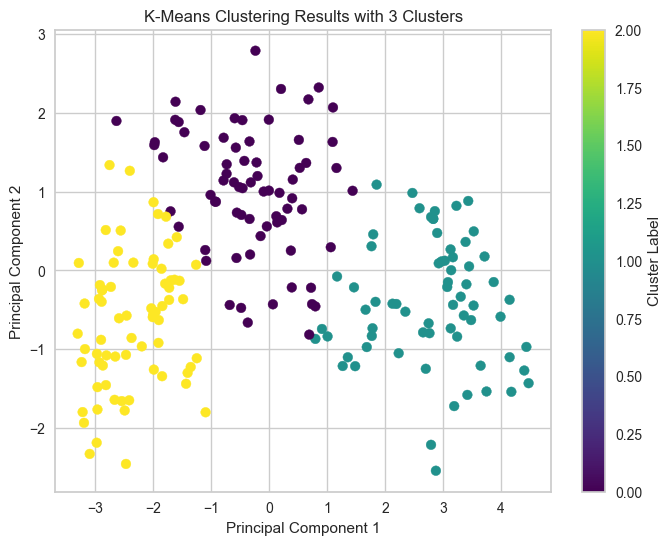

In [326]:
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# plot results to check the results above
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=cluster_labels, cmap="viridis", marker="o")
plt.title(f"K-Means Clustering Results with {n_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [327]:
# Calculate the three different validation metrics
average_sil_score = silhouette_score(scaled_X, test_clusters)
average_cal_score = calinski_harabasz_score(scaled_X, test_clusters)
average_dav_score = davies_bouldin_score(scaled_X, test_clusters)

### Step 3: Display results

In [328]:
# display results
result = {
    "Metric": ["Silhouette Score", "Calinski-Harabasz Index", "Davies-Bouldin Index"],
    "Score": [average_sil_score, average_cal_score, average_dav_score]
}

result_df = pd.DataFrame(result)
result_df

,Metric,Score
0,Silhouette Score,0.400727
1,Calinski-Harabasz Index,249.784175
2,Davies-Bouldin Index,0.927871


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*